<a href="https://colab.research.google.com/github/MafeGomez-11/Metodos1_MariaFernandaGomez_MarianaMoya/blob/main/Parcial_3/BosonHiggs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Higgs boson discovery:** Imagine que se encuentra en el laboratorio CERN y está colaborando en el descubrimiento de una nueva partícula, la cual está caracterizada por su masa y su ancho. Para realizar esta tarea se sugiere la siguiente estrategia:

(a) Descargue los datos de la masa invariante de dos fotones (https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/HiggsFitting.csv). Estamos estudiando el canal de Higgs a dos gotones ($H\rightarrow \gamma\gamma$).

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_csv('https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/HiggsFitting.csv')
data.keys()
m=data['Higgs']

(b) Dibuje la distribución de frecuencia de los datos entre 100 y 160 Gev, en 30 bines. El dibujo debería tener la barra de error del histograma. Use el siguiente código:```plt.errorbar(m,HsignalBkg,yerr=0.5*np.sqrt(HSignalBkg,fmt='none',ecolor='k', capzise=5) ```

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


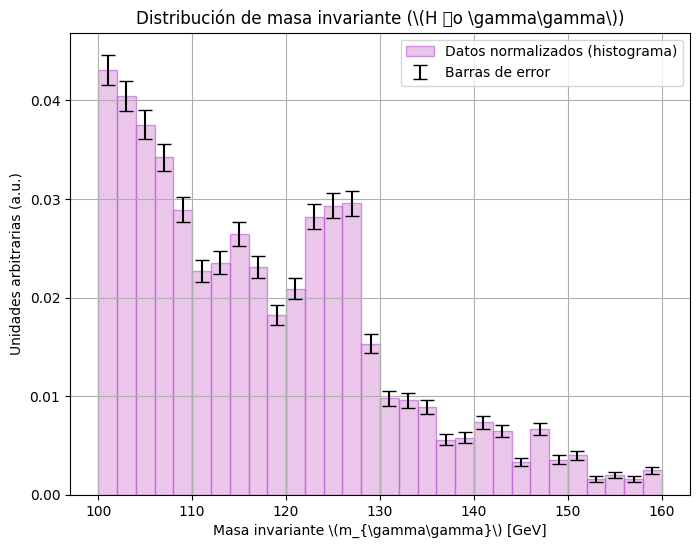

In [92]:
data_filtrado = m[(m >= 100) & (m <= 160)]
bins = np.linspace(100, 160, 31)
HSignalBkg, bin_edges = np.histogram(data_filtrado, bins=bins)
m = 0.5 * (bin_edges[1:] + bin_edges[:-1])

HSignalBkg_norm = HSignalBkg / (np.sum(HSignalBkg) * (bins[1] - bins[0]))

plt.figure(figsize=(8, 6))
plt.errorbar(m, HSignalBkg_norm, yerr=0.5 * np.sqrt(HSignalBkg) / (np.sum(HSignalBkg) * (bins[1] - bins[0])),
             fmt='none', ecolor='k', capsize=5, label="Barras de error")
plt.hist(data_filtrado, bins=bins, density=True, alpha=0.6, color='plum', edgecolor='mediumorchid', label="Datos normalizados (histograma)")
plt.xlabel("Masa invariante \(m_{\gamma\gamma}\) [GeV]")
plt.ylabel("Unidades arbitrarias (a.u.)")
plt.title("Distribución de masa invariante (\(H \to \gamma\gamma\))")
plt.legend()
plt.grid(True)
plt.show()


(c) Defina el modelo para la hipótesis nula, es decir el escenario donde no existe el bosón de Higgs: $\mathcal{L}(\alpha ,x)=\frac{1}{\alpha}e^{-(x-100)/\alpha}$. Donde $\alpha$ es el parámetro a ser determinado.


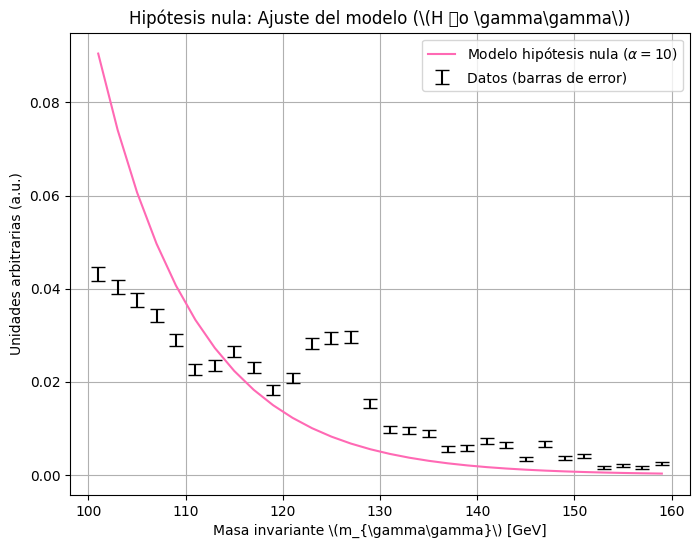

In [93]:
def hipotesis_nula(alpha, x):
    return (1 / alpha) * np.exp(-(x - 100) / alpha)


alpha_inicial = 10

model_null = hipotesis_nula(alpha_inicial, m)

plt.figure(figsize=(8, 6))
plt.errorbar(m, HSignalBkg_norm, yerr=0.5 * np.sqrt(HSignalBkg) / (np.sum(HSignalBkg) * (bins[1] - bins[0])),
             fmt='none', ecolor='k', capsize=5, label="Datos (barras de error)")
plt.plot(m, model_null, color='hotpink', label=f"Modelo hipótesis nula ($\\alpha={alpha_inicial}$)")
plt.xlabel("Masa invariante \(m_{\gamma\gamma}\) [GeV]")
plt.ylabel("Unidades arbitrarias (a.u.)")
plt.title("Hipótesis nula: Ajuste del modelo (\(H \to \gamma\gamma\))")
plt.legend()
plt.grid(True)
plt.show()


(d) Defina la función de minimizar, en este caso es el negativo de la función conjunta de verosimilitud: $\mathcal{L}(\alpha ,\textbf{x})=-\sum^{n}_{i=1}ln(\mathcal{L}(\alpha ,x_i))$

In [94]:
def funcion_a_minimizar(alpha, x):
    return -np.sum(np.log(hipotesis_nula(alpha, x)))

from scipy.optimize import minimize

bounds=[(0,50)]
resultado=minimize(funcion_a_minimizar, x0=[10], args=(data_filtrado,), bounds=bounds )
alpha_n=resultado.x[0]
print(f"Alpha ajustado: {alpha_n}")

Alpha ajustado: 17.61888053628762


(e) Use el paquete **optimize** para encontrar el parámetro de la hipótesis nula. Use el siguiente límite del parámetro: **bounds=( (0,50), ).

(f) Dibuje los datos y el modelo.

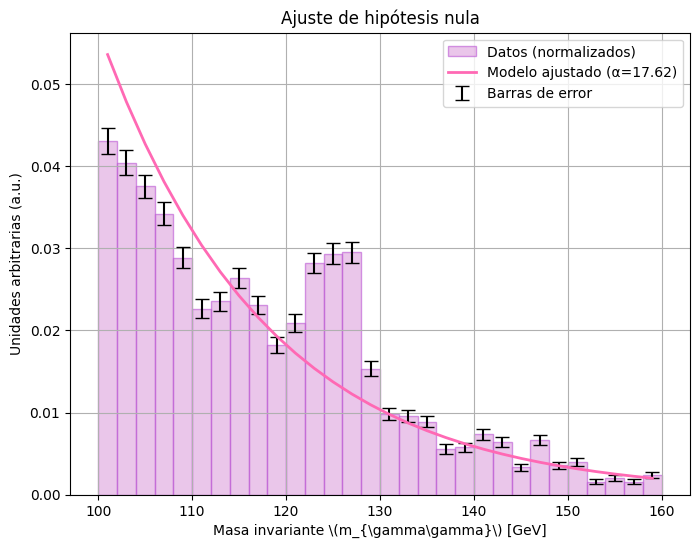

In [95]:
def modelo_ajustado(x, alpha):
    return (1 / alpha) * np.exp(-(x - 100) / alpha)

HSignalBkg_norm = HSignalBkg / (np.sum(HSignalBkg) * (bins[1] - bins[0]))

plt.figure(figsize=(8, 6))
plt.errorbar(m, HSignalBkg_norm, yerr=0.5 * np.sqrt(HSignalBkg) / (np.sum(HSignalBkg) * (bins[1] - bins[0])),
             fmt='none', ecolor='k', capsize=5, label="Barras de error")
plt.hist(data_filtrado, bins=bins, density=True, alpha=0.6, color='plum', edgecolor='mediumorchid', label="Datos (normalizados)")
plt.plot(m, modelo_ajustado(m, alpha_n), color='hotpink', lw=2, label=f"Modelo ajustado (α={alpha_n:.2f})")
plt.xlabel("Masa invariante \(m_{\gamma\gamma}\) [GeV]")
plt.ylabel("Unidades arbitrarias (a.u.)")
plt.title("Ajuste de hipótesis nula")
plt.legend()
plt.grid(True)
plt.show()

(g) Defina el modelo para la hipótesis alternativa, es decir el escenario donde si existe el bosón de Higgs: $\mathcal{L}(A,\mu,\sigma,\alpha,x)=(A)\frac{1}{\sqrt{2\pi \sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}+(1-A)\frac{1}{\alpha}e^{-\frac{(x-100)}{\alpha}}$.Donde $A, \mu, \sigma, \alpha$ son los parámetros a ser determinados. $A$ es la proporción de eventos de señal respecto al ruido experimental, $\mu$ es la masa de resonancia, $\sigma$ es el ancho de la resonancia, y $\alpha$ es la constante de decaimiento del background.

(h) Defina la función de minimizar, en este caso es el negativo de la función conjunta de verosimilitud: $\mathcal{L}(A,\mu,\sigma,\alpha,\textbf{x})= -\sum^{n}_{i=1}ln(\mathcal{L}(A,\mu,\sigma,\alpha,x_i))$.

(i) Use el paquete **optimize** para encontrar el parámetro de la hipótesis nula. Use el siguiente límite del parámetro: **bounds = ( (0,1),(50,500),(1,100), (1,100))**.

(j) Encuentre el mejor ajuste de le hipótesis altermativa y dibuje ambos ajustes.

(k) ¿Cuál es el valor de las constantes físicas? $A,\mu,\sigma,\alpha$

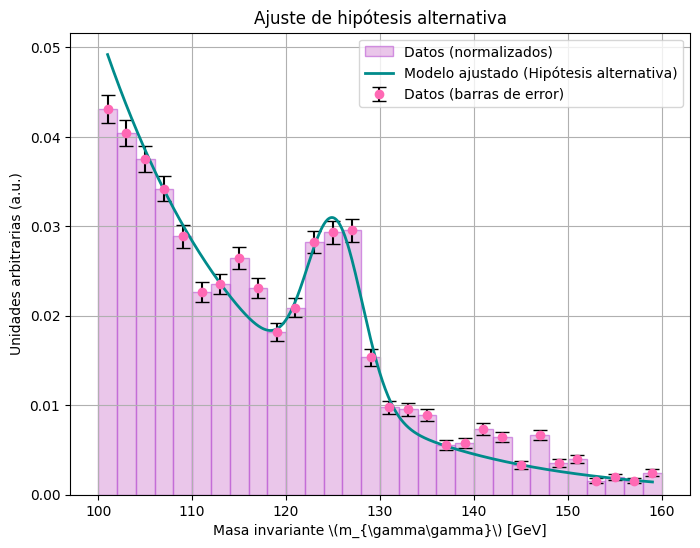

Parámetros ajustados:
 A = 0.15, mu = 125.19, sigma = 2.95, alpha = 16.34


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

data = pd.read_csv('https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/HiggsFitting.csv')
m = data['Higgs']


data_filtrado = m[(m >= 100) & (m <= 160)]
bins = np.linspace(100, 160, 31)
HSignalBkg, bin_edges = np.histogram(data_filtrado, bins=bins)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
HSignalBkg_norm = HSignalBkg / (np.sum(HSignalBkg) * (bins[1] - bins[0]))


def hipotesis_alternativa(params, x):
    A, mu, sigma, alpha = params
    signal = A * (1 / (np.sqrt(2 * np.pi * sigma**2))) * np.exp(-(x - mu)**2 / (2 * sigma**2))  # Gaussiana
    background = (1 - A) * (1 / alpha) * np.exp(-(x - 100) / alpha)  # Exponencial para fondo
    return signal + background

def funcion_a_minimizar_alt(params, x, y):
    prediccion = hipotesis_alternativa(params, x)
    prediccion = np.clip(prediccion, 1e-10, None)
    return -np.sum(np.log(prediccion) * y)

parametros_iniciales = [0.2, 125, 2, 20]
bounds = [(0, 1), (100, 160), (0.1, 50), (1, 100)]

resultado_alt = minimize(
    funcion_a_minimizar_alt,
    parametros_iniciales,
    args=(bin_centers, HSignalBkg_norm),
    bounds=bounds,
    method='L-BFGS-B',
    options={'disp': True}
)

A_ajustado, mu_ajustado, sigma_ajustado, alpha_ajustado = resultado_alt.x

m_fino = np.linspace(bin_centers.min(), bin_centers.max(), 1000)
modelo_ajustado_alt = hipotesis_alternativa([A_ajustado, mu_ajustado, sigma_ajustado, alpha_ajustado], m_fino)

plt.figure(figsize=(8, 6))
plt.errorbar(bin_centers, HSignalBkg_norm, yerr=0.5 * np.sqrt(HSignalBkg) / (np.sum(HSignalBkg) * (bins[1] - bins[0])),
             fmt='o', ecolor='black',color="hotpink", capsize=5, label="Datos (barras de error)")
plt.hist(data_filtrado, bins=bins, density=True, alpha=0.6, color='plum', edgecolor='mediumorchid', label="Datos (normalizados)")
plt.plot(m_fino, modelo_ajustado_alt, color='darkcyan', lw=2, label="Modelo ajustado (Hipótesis alternativa)")
plt.xlabel("Masa invariante \(m_{\gamma\gamma}\) [GeV]")
plt.ylabel("Unidades arbitrarias (a.u.)")
plt.title("Ajuste de hipótesis alternativa")
plt.legend()
plt.grid(True)
plt.show()

print(f"Parámetros ajustados:\n A = {A_ajustado:.2f}, mu = {mu_ajustado:.2f}, sigma = {sigma_ajustado:.2f}, alpha = {alpha_ajustado:.2f}")

(l) Estime el número de desviaciones estándar entre la observación y la hipótesis nula: $n\sigma\approx \sqrt{-2\ ln\ (\frac{\mathcal{L}(A,\mu,\sigma,\alpha,\textbf{x})}{\mathcal{L}(\alpha ,\textbf{x})})}$. Si este valor es mayor a 5 se puede proclamar un descubrimiento! La fórmula es una aproximación descrita en https://arxiv.org/html/2411.00706v1#S4

In [97]:
alpha_ajustado_nula = 17.61
A_ajustado = 0.15
mu_ajustado = 125.19
sigma_ajustado = 2.95
alpha_ajustado = 16.34

x=np.mean(data_filtrado)
Resp_alternativa=hipotesis_alternativa([A_ajustado, mu_ajustado, sigma_ajustado, alpha_ajustado], x)
Resp_nula=hipotesis_nula(alpha_ajustado_nula, x)
desviaciones_estandar = np.sqrt(-2 * np.log(Resp_alternativa / Resp_nula))
desviaciones_estandar


0.497498520239422

In [98]:
import numpy as np

def n_sigma(L_alt, L_null):
    if L_alt <= 0 or L_null <= 0:
        raise ValueError("Las verosimilitudes deben ser mayores que 0.")
    log_ratio = -2 * np.log(L_alt / L_null)
    return np.sqrt(log_ratio)

L_alt = hipotesis_alternativa([A_ajustado, mu_ajustado, sigma_ajustado, alpha_ajustado], x)
L_null = hipotesis_nula(alpha_ajustado, x)

n_sigma = n_sigma(L_alt, L_null)

print(f"El número de desviaciones estándar es: {n_sigma:.2f}")
if n_sigma > 5:
    print("¡Descubrimiento proclamado!")
else:
    print("No se puede proclamar un descubrimiento.")


El número de desviaciones estándar es: 0.49
No se puede proclamar un descubrimiento.


(m) Con el valor de $\sigma$, encuentre el tiempo de vida de la partícula: $\tau = \frac{\hbar}{\sigma}$, donde $\hbar=1.015x10^{-23} J\cdot s$ . Debe convertir la unidad GeV a J.

In [99]:
h_barra= 1.015e-23 #J*s
tiempo= h_barra / (sigma_ajustado*1.602e-10)  #J*s /J
print(f"El tiempo de vida de la partícula es de {tiempo:.2e} segundos.")

El tiempo de vida de la partícula es de 2.15e-14 segundos.


(n) Ahora debe calcular los errores en la estimación del modelo con bosón de Higgs. Para esto vamos a usar el paquete **emcee** para encontrar la distribución posterior y marginal. Use las funciones de verosimilitud mostradas en los incisos anteriores y defina una distribución prior:
```def LogPrior(p):
     \
      A, mu, sigma, alpha=p
      \
       if 0. < A < 1. and 100. <= mu<=300. and 0.1<=sigma<=20. and 1<=alpha<=50:
       \
       return 0.
       \
       else:
       \
       return -np.inf ```

(o) Genere el muestreo de la distribución posterior. Las caminatas aleatorias y el corner plot de las distribuciones marginales deberiam verse como en la figura [9.10]

In [100]:
!pip install emcee
!pip install corner

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner

100%|██████████| 800/800 [01:22<00:00,  9.70it/s]


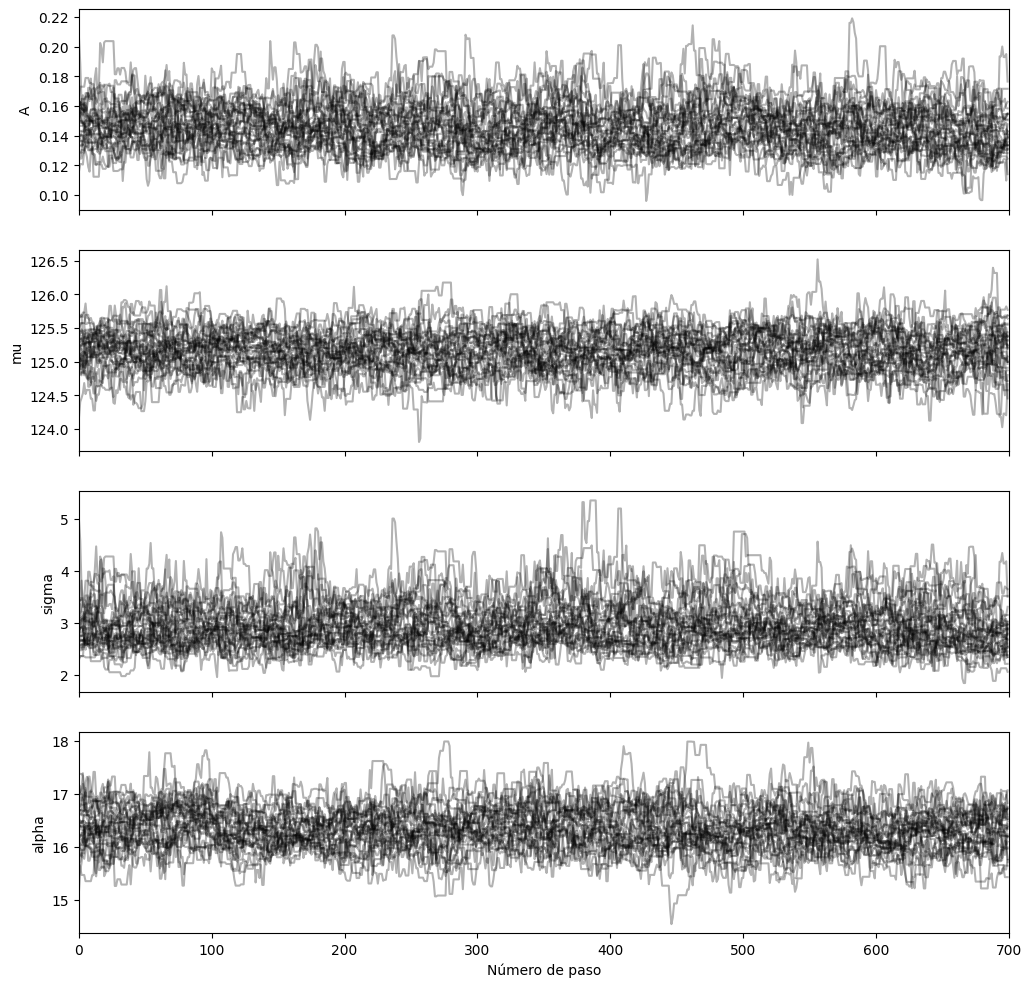

In [102]:
import numpy as np
import emcee
import matplotlib.pyplot as plt
from scipy.optimize import minimize


def LogPrior(p):
    A, mu, sigma, alpha = p
    if 0. < A < 1. and 100. <= mu <= 300. and 0.1 <= sigma <= 20. and 1 <= alpha <= 50:
        return 0.
    else:
        return -np.inf

def Likelihood(p, x):
    return hipotesis_alternativa(p, x)

def JointLikelihood(p, x):
    return +np.sum(np.log(Likelihood(p, x)))

def LogPosterior(p, x):
    LogP = LogPrior(p)
    if not np.isfinite(LogP):
        return -np.inf
    else:
        return LogP + JointLikelihood(p, x)


result = minimize(funcion_a_minimizar_alt, parametros_iniciales, args=(bin_centers, HSignalBkg), bounds=bounds)
best_params = result.x


n_walkers, n_params = 30, 4
p0 = np.random.normal(loc=best_params, scale=0.05, size=(n_walkers, n_params))

sampler = emcee.EnsembleSampler(n_walkers, n_params, LogPosterior, args=(m,))

n_steps = 800
burn_in = 100

pos, prob, state = sampler.run_mcmc(p0, 800, progress=True)
samples = sampler.get_chain(discard=burn_in)


fig, axes = plt.subplots(n_params, figsize=(12, 12), sharex=True)
labels = ["A", "mu", "sigma", "alpha"]

for i in range(n_params):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])

plt.xlabel("Número de paso")
plt.show()

In [103]:
flat_samples = sampler.get_chain(discard=burn_in, flat=True)
truths = np.percentile(flat_samples, 50, axis=0)
truths

array([  0.14513938, 125.17119682,   2.88377395,  16.32885047])

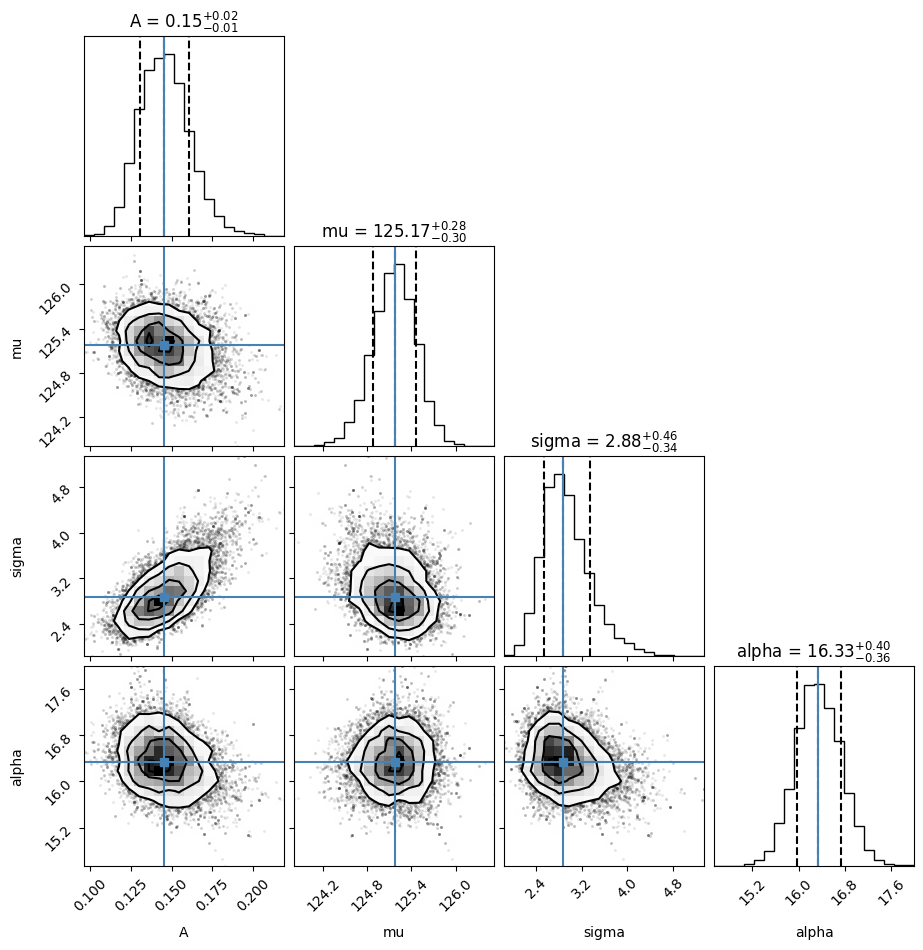

In [104]:
figure= corner.corner(flat_samples, labels=labels, truths=truths,quantiles=[0.16,0.5,0.84], show_titles=True)


In [105]:
# Calcular los intervalos de confianza para cada parámetro
import numpy as np

# Percentiles del 68% (1 sigma) y 95% (2 sigma) para cada parámetro
A_68 = np.percentile(samples[:, 0], [16, 84])  # Intervalo de confianza del 68%
mu_68 = np.percentile(samples[:, 1], [16, 84])
sigma_68 = np.percentile(samples[:, 2], [16, 84])
alpha_68 = np.percentile(samples[:, 3], [16, 84])

A_95 = np.percentile(samples[:, 0], [2.5, 97.5])  # Intervalo de confianza del 95%
mu_95 = np.percentile(samples[:, 1], [2.5, 97.5])
sigma_95 = np.percentile(samples[:, 2], [2.5, 97.5])
alpha_95 = np.percentile(samples[:, 3], [2.5, 97.5])

# Imprimir los resultados de los intervalos de confianza
print(f"Intervalo de confianza 68% para A: {A_68}")
print(f"Intervalo de confianza 68% para mu: {mu_68}")
print(f"Intervalo de confianza 68% para sigma: {sigma_68}")
print(f"Intervalo de confianza 68% para alpha: {alpha_68}")

print(f"Intervalo de confianza 95% para A: {A_95}")
print(f"Intervalo de confianza 95% para mu: {mu_95}")
print(f"Intervalo de confianza 95% para sigma: {sigma_95}")
print(f"Intervalo de confianza 95% para alpha: {alpha_95}")


Intervalo de confianza 68% para A: [  0.15634246 125.19139787]
Intervalo de confianza 68% para mu: [  0.1504711  125.10092587]
Intervalo de confianza 68% para sigma: [  0.15415131 124.92593643]
Intervalo de confianza 68% para alpha: [  0.15847606 125.02986534]
Intervalo de confianza 95% para A: [  0.12768005 125.60191127]
Intervalo de confianza 95% para mu: [1.22422670e-01 1.25624908e+02]
Intervalo de confianza 95% para sigma: [  0.1289231  125.40503106]
Intervalo de confianza 95% para alpha: [  0.13312841 125.54435848]


(p) ¿Cuál es el error porcentual de la estmación de la masa de esta partícula?

In [106]:
error = (np.abs(mu_ajustado-125.11)/125.11)*100
print(f"El error porcentual de la estimación de la masa de la partícula es de {error:.2f}%")

El error porcentual de la estimación de la masa de la partícula es de 0.06%
